## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  52.549644  1715.921145  0.055661  9.629034  1.109137
1  38.082967  1296.217631  0.354576  8.853066  1.572820
2  70.643705  1343.393548  0.196736  1.828587  1.374355
3  67.909692   767.186779  0.284560  7.067785  1.215982
4  54.485941   801.079809  0.219335  9.138229  1.003841


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0670165	total: 58.9ms	remaining: 58.9s
1:	learn: 1.0590651	total: 59.6ms	remaining: 29.7s
2:	learn: 1.0505141	total: 60.1ms	remaining: 20s
3:	learn: 1.0412141	total: 60.6ms	remaining: 15.1s
4:	learn: 1.0297810	total: 61ms	remaining: 12.1s
5:	learn: 1.0217642	total: 61.6ms	remaining: 10.2s
6:	learn: 1.0110474	total: 62.2ms	remaining: 8.82s
7:	learn: 1.0024718	total: 62.7ms	remaining: 7.78s
8:	learn: 0.9935155	total: 63.1ms	remaining: 6.95s
9:	learn: 0.9848342	total: 63.5ms	remaining: 6.29s
10:	learn: 0.9765645	total: 63.8ms	remaining: 5.74s
11:	learn: 0.9664057	total: 64.2ms	remaining: 5.28s
12:	learn: 0.9576778	total: 64.6ms	remaining: 4.91s
13:	learn: 0.9481861	total: 65.1ms	remaining: 4.58s
14:	learn: 0.9397391	total: 65.5ms	remaining: 4.3s
15:	learn: 0.9321591	total: 65.8ms	remaining: 4.05s
16:	learn: 0.9236883	total: 66.2ms	remaining: 3.83s
17:	learn: 0.9170877	total: 66.6ms	remaining: 3.63s
18:	learn: 0.9099392	total: 66.9ms	remaining: 3.4

118:	learn: 0.4359366	total: 108ms	remaining: 803ms
119:	learn: 0.4334589	total: 109ms	remaining: 798ms
120:	learn: 0.4303858	total: 109ms	remaining: 794ms
121:	learn: 0.4283671	total: 110ms	remaining: 789ms
122:	learn: 0.4261594	total: 110ms	remaining: 784ms
123:	learn: 0.4236200	total: 110ms	remaining: 780ms
124:	learn: 0.4210818	total: 111ms	remaining: 780ms
125:	learn: 0.4189723	total: 112ms	remaining: 777ms
126:	learn: 0.4167281	total: 112ms	remaining: 772ms
127:	learn: 0.4140660	total: 113ms	remaining: 767ms
128:	learn: 0.4115212	total: 113ms	remaining: 764ms
129:	learn: 0.4090365	total: 114ms	remaining: 760ms
130:	learn: 0.4065310	total: 114ms	remaining: 757ms
131:	learn: 0.4045548	total: 115ms	remaining: 753ms
132:	learn: 0.4020595	total: 115ms	remaining: 750ms
133:	learn: 0.4002668	total: 115ms	remaining: 744ms
134:	learn: 0.3977228	total: 116ms	remaining: 740ms
135:	learn: 0.3954484	total: 116ms	remaining: 738ms
136:	learn: 0.3930355	total: 116ms	remaining: 734ms
137:	learn: 

294:	learn: 0.1878054	total: 186ms	remaining: 446ms
295:	learn: 0.1869848	total: 187ms	remaining: 445ms
296:	learn: 0.1861424	total: 188ms	remaining: 444ms
297:	learn: 0.1851758	total: 188ms	remaining: 443ms
298:	learn: 0.1843553	total: 188ms	remaining: 442ms
299:	learn: 0.1838039	total: 189ms	remaining: 440ms
300:	learn: 0.1830890	total: 189ms	remaining: 440ms
301:	learn: 0.1823150	total: 190ms	remaining: 438ms
302:	learn: 0.1815489	total: 190ms	remaining: 437ms
303:	learn: 0.1806037	total: 190ms	remaining: 436ms
304:	learn: 0.1800743	total: 191ms	remaining: 435ms
305:	learn: 0.1792025	total: 191ms	remaining: 434ms
306:	learn: 0.1784359	total: 192ms	remaining: 432ms
307:	learn: 0.1775452	total: 192ms	remaining: 432ms
308:	learn: 0.1768182	total: 193ms	remaining: 431ms
309:	learn: 0.1760702	total: 193ms	remaining: 430ms
310:	learn: 0.1753220	total: 193ms	remaining: 428ms
311:	learn: 0.1745743	total: 194ms	remaining: 427ms
312:	learn: 0.1738419	total: 194ms	remaining: 426ms
313:	learn: 

537:	learn: 0.0754304	total: 291ms	remaining: 250ms
538:	learn: 0.0751215	total: 292ms	remaining: 250ms
539:	learn: 0.0750138	total: 292ms	remaining: 249ms
540:	learn: 0.0748235	total: 293ms	remaining: 248ms
541:	learn: 0.0745838	total: 293ms	remaining: 248ms
542:	learn: 0.0744775	total: 294ms	remaining: 247ms
543:	learn: 0.0742142	total: 294ms	remaining: 246ms
544:	learn: 0.0740283	total: 294ms	remaining: 246ms
545:	learn: 0.0739232	total: 295ms	remaining: 245ms
546:	learn: 0.0736909	total: 295ms	remaining: 245ms
547:	learn: 0.0734004	total: 296ms	remaining: 244ms
548:	learn: 0.0731764	total: 296ms	remaining: 243ms
549:	learn: 0.0729431	total: 297ms	remaining: 243ms
550:	learn: 0.0728392	total: 297ms	remaining: 242ms
551:	learn: 0.0725532	total: 297ms	remaining: 241ms
552:	learn: 0.0724506	total: 298ms	remaining: 241ms
553:	learn: 0.0722219	total: 298ms	remaining: 240ms
554:	learn: 0.0721204	total: 299ms	remaining: 239ms
555:	learn: 0.0719271	total: 299ms	remaining: 239ms
556:	learn: 

717:	learn: 0.0453774	total: 369ms	remaining: 145ms
718:	learn: 0.0453276	total: 369ms	remaining: 144ms
719:	learn: 0.0452592	total: 369ms	remaining: 144ms
720:	learn: 0.0451058	total: 370ms	remaining: 143ms
721:	learn: 0.0450386	total: 370ms	remaining: 142ms
722:	learn: 0.0449895	total: 371ms	remaining: 142ms
723:	learn: 0.0449233	total: 371ms	remaining: 141ms
724:	learn: 0.0448747	total: 371ms	remaining: 141ms
725:	learn: 0.0447496	total: 372ms	remaining: 140ms
726:	learn: 0.0446039	total: 372ms	remaining: 140ms
727:	learn: 0.0445393	total: 373ms	remaining: 139ms
728:	learn: 0.0444168	total: 373ms	remaining: 139ms
729:	learn: 0.0442699	total: 374ms	remaining: 138ms
730:	learn: 0.0442066	total: 374ms	remaining: 138ms
731:	learn: 0.0441587	total: 374ms	remaining: 137ms
732:	learn: 0.0441010	total: 375ms	remaining: 137ms
733:	learn: 0.0440442	total: 375ms	remaining: 136ms
734:	learn: 0.0439550	total: 376ms	remaining: 135ms
735:	learn: 0.0438934	total: 376ms	remaining: 135ms
736:	learn: 

964:	learn: 0.0254413	total: 473ms	remaining: 17.2ms
965:	learn: 0.0253749	total: 474ms	remaining: 16.7ms
966:	learn: 0.0253525	total: 474ms	remaining: 16.2ms
967:	learn: 0.0253002	total: 474ms	remaining: 15.7ms
968:	learn: 0.0252443	total: 475ms	remaining: 15.2ms
969:	learn: 0.0251905	total: 475ms	remaining: 14.7ms
970:	learn: 0.0251684	total: 476ms	remaining: 14.2ms
971:	learn: 0.0251206	total: 476ms	remaining: 13.7ms
972:	learn: 0.0250988	total: 477ms	remaining: 13.2ms
973:	learn: 0.0250196	total: 477ms	remaining: 12.7ms
974:	learn: 0.0249729	total: 477ms	remaining: 12.2ms
975:	learn: 0.0249179	total: 478ms	remaining: 11.8ms
976:	learn: 0.0248939	total: 478ms	remaining: 11.3ms
977:	learn: 0.0248422	total: 479ms	remaining: 10.8ms
978:	learn: 0.0248210	total: 479ms	remaining: 10.3ms
979:	learn: 0.0247627	total: 480ms	remaining: 9.79ms
980:	learn: 0.0247086	total: 480ms	remaining: 9.3ms
981:	learn: 0.0246327	total: 481ms	remaining: 8.81ms
982:	learn: 0.0246092	total: 481ms	remaining: 8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

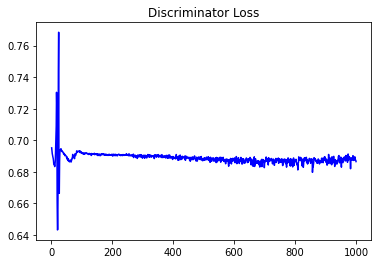

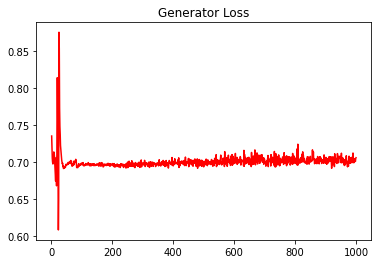

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.6381361446132457


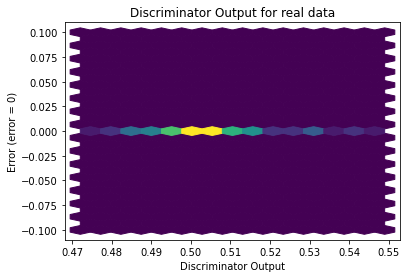

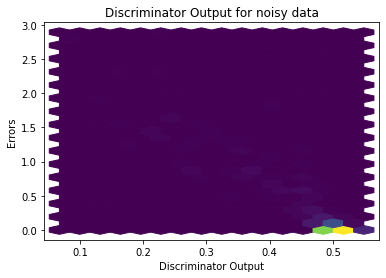

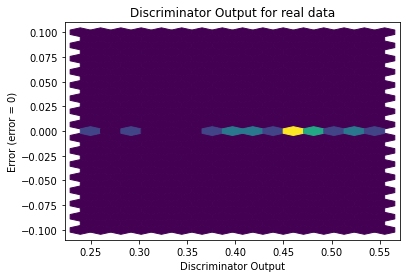

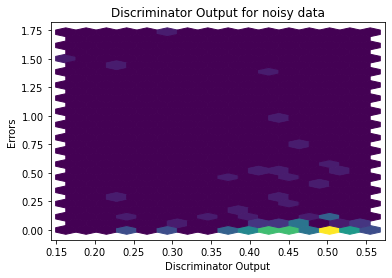

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


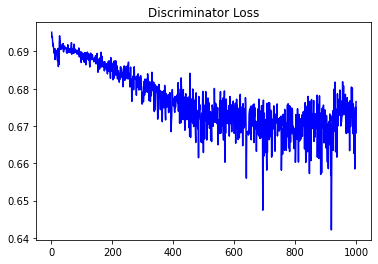

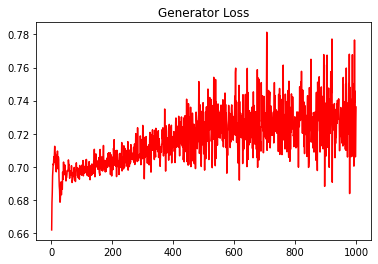

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.390195704949727


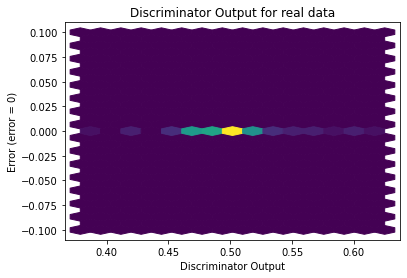

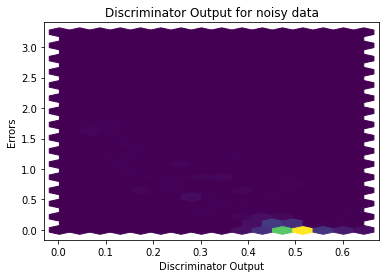

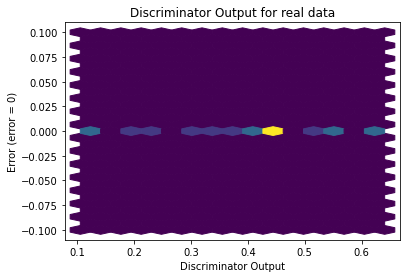

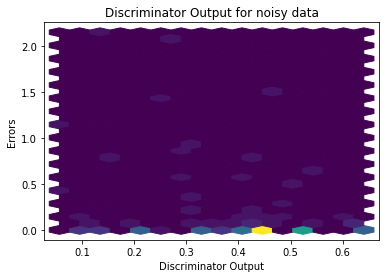

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2014]], requires_grad=True)
